# 유사도와 비유사도 

## 두 점 사이의 거리 (Distance Formula) 

### from sklearn.neighbors import DistanceMetric
#### metric 
- "euclidean”: 유클리드 거리 
- "manhattan", : 맨하탄 거리 
- "minkowski”: 민코우스키 
- "hamming" : 해밍 거리 
- ...

#### 유클리드 거리 

In [1]:
## 직접 계산 
import warnings
# FutureWarning 제거
warnings.simplefilter(action='ignore', category=FutureWarning) 

# 함수 정의 
def euclidean_distance(pt1, pt2):
    distance = 0
    for i in range(len(pt1)):
        distance += (pt1[i] - pt2[i]) ** 2
    return distance ** 0.5

X = [[5, 4, 3],[1, 7, 9]]

print(euclidean_distance(X[0],X[1] ))

## sklearn DistanceMetric(metric : euclidean )
from sklearn.neighbors import DistanceMetric
dist_eu = DistanceMetric.get_metric('euclidean')

# Compute the pairwise distances between X and Y
print(dist_eu.pairwise(X))

7.810249675906654
[[0.         7.81024968]
 [7.81024968 0.        ]]


#### 맨하탄 거리(Manhattan Distance)

In [2]:
## 직접 계산 

## 함수 정의 
def manhattan_distance(pt1, pt2):
    distance = 0
    for i in range(len(pt1)):
        distance += abs(pt1[i] - pt2[i])
    return distance
X = [[5, 4, 3],[1, 7, 9]]

print(manhattan_distance(X[0],X[1] ))

## sklearn DistanceMetric(metric : manhattan )
from sklearn.neighbors import DistanceMetric
dist_man = DistanceMetric.get_metric('manhattan')

# Compute the pairwise distances between X and Y
print(dist_man.pairwise(X))

13
[[ 0. 13.]
 [13.  0.]]


#### 해밍 거리(Hamming Distance)
- 정확히 같은지’ 여부만 고려, 다른 값 count 

In [3]:
## 직접 계산  
def hamming_distance(pt1, pt2):
    distance = 0
    for i in range(len(pt1)):
        if pt1[i] != pt2[i]:
            distance += 1
            hamm_v = distance / len(pt1)
    return hamm_v

X = [[5, 4, 3],[1, 7, 9]]
print(hamming_distance(X[0], X[1]))

X = [[1, 4, 3],[1, 7, 9]]
print(hamming_distance(X[0], X[1]))

## sklearn DistanceMetric(metric : hamming )
from sklearn.neighbors import DistanceMetric

dist_ham = DistanceMetric.get_metric('hamming')

# Compute the pairwise distances between X and Y
print(dist_ham.pairwise(X))

1.0
0.6666666666666666
[[0.         0.66666667]
 [0.66666667 0.        ]]


#### 민코우스키 거리 
- p값 1 :맨허튼 거리, p값 2 :유클리드 거리 

In [4]:
## sklearn DistanceMetric(metric : minkowski, p=scalar )
from sklearn.neighbors import DistanceMetric
X = [[5, 4, 3],[1, 7, 9]]
dist_ham = DistanceMetric.get_metric('minkowski', p=2)

# Compute the pairwise distances between X and Y
print(dist_ham.pairwise(X))

[[0.         7.81024968]
 [7.81024968 0.        ]]


# K-NN(K-Nearest Neighbor)

### from sklearn.neighbors import KNeighborsClassifier
####  입력 인수
- n_neighbors: neighbor의 개수
- metric: distance metric의 종류. 'euclidean', 'manhattan', 'chebyshev', 'minkowsk' 등 

In [5]:
## 라이브러리 임포트 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier ## K-NN 
from sklearn.metrics import confusion_matrix, classification_report

In [6]:
## 데이터 셋 
from sklearn.datasets import load_breast_cancer

# 데이터 불러오기
data = load_breast_cancer()

# 독립변수 (input data)
b_input_data = data['data'] 

# 종양 : 악성(0), 양성(1) 여부 (target data)
b_target_data = data['target'] 

# 종양 구분 
tumar = data['target_names'] 

# 속성 명칭 
feature_names = data['feature_names'] 

print('종양 여부 결정 속성 : {}'.format(feature_names))
print('종양 구분 : {}'.format(tumar))

breast_df = pd.DataFrame(b_input_data, columns=feature_names)
breast_df['target'] = b_target_data

# 속성명 공백에 "_"달기 
breast_df.columns = [col.replace(" ", "_") for col in breast_df.columns]

# label 데이터 비율 확인 
breast_df['target'].value_counts()

종양 여부 결정 속성 : ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
종양 구분 : ['malignant' 'benign']


1    357
0    212
Name: target, dtype: int64

In [7]:
# 악성(malignant:0), 양성(benign:1)인지 
breast_df.head(2)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0


In [8]:
# X = breast_df[['mean_radius', 'mean_texture', 'mean_perimeter' ]] # 독립변수 

# X = breast_df[['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
#                'mean_smoothness', 'mean_compactness', 'mean_concavity',
#                'mean_concave_points', 'mean_symmetry', 'mean_fractal_dimension' ]] # 독립변수 

## 학습 데이터 셋 생성 
# 평균관련 된 3개의 속성으로 종양 여부 판단 
model_feautre_name = ['mean_radius', 'mean_texture', 'mean_perimeter' ] 
X = breast_df[model_feautre_name]
Y = breast_df['target']

# 80%의 데이터를 학습 데이터로, 20%를 테스트 데이터 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 20) 

In [9]:
type(y_train)

pandas.core.series.Series

In [10]:
## 스케일링 & 정규화 : 거리기반 알고리즘은 기본으로 표준화, 정규화 수행 필요 
from sklearn.preprocessing import StandardScaler

## 스케일링 & 정규화
scaler = StandardScaler()
X_train_std=scaler.fit_transform(X_train)
X_test_std=scaler.fit_transform(X_test)

# 스케일링(각 속성3개에 대한 표준화 수행 결과 확인)
for col in range(3):
    print(f'평균 = {X_train_std[:, col].mean()}, 표준편차= {X_train_std[:, col].std()}')
    
for col in range(3):
    print(f'평균 = {X_test_std[:, col].mean()}, 표준편차= {X_test_std[:, col].std()}')

평균 = -6.109886711343719e-16, 표준편차= 1.0000000000000002
평균 = -3.2833320921661774e-15, 표준편차= 1.0000000000000002
평균 = 2.851931145454688e-15, 표준편차= 1.0000000000000004
평균 = -1.1472304587793285e-15, 표준편차= 1.0
평균 = 4.4798472923471226e-17, 표준편차= 0.9999999999999999
평균 = -1.1842378929335002e-15, 표준편차= 0.9999999999999998


In [11]:
## 학습/예측(Training/Pradiction)
# k-NN 분류기를 생성 
# "가장 가까운 3개 중에 A:1,C:2"이면 타겟데이터는 "C"로 분류
knn_clf = KNeighborsClassifier(n_neighbors=3)

# 분류기 학습
knn_clf.fit(X_train_std, y_train)
# 예측
y_pred = knn_clf.predict(X_test_std)

## 모델 평가
print("테스트 세트 정확도: {:.2f}".format(knn_clf.score(X_test_std, y_test)))

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

report = classification_report(y_test, y_pred)
print(report)

테스트 세트 정확도: 0.91
[[42  6]
 [ 4 62]]
              precision    recall  f1-score   support

           0       0.91      0.88      0.89        48
           1       0.91      0.94      0.93        66

    accuracy                           0.91       114
   macro avg       0.91      0.91      0.91       114
weighted avg       0.91      0.91      0.91       114



[0.8859649122807017, 0.8771929824561403, 0.9122807017543859, 0.9122807017543859, 0.956140350877193, 0.9298245614035088, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9210526315789473, 0.9385964912280702, 0.9210526315789473, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9385964912280702, 0.9298245614035088, 0.9385964912280702, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9385964912280702, 0.9385964912280702]


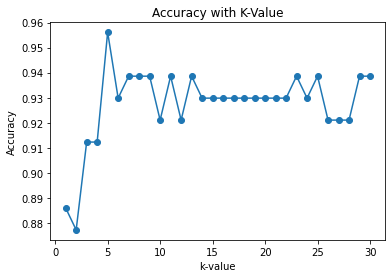

In [12]:
## 모델 개선 - k값을 변화시킬 때, accuracy가 증가하는 지 확인 
accuracy_knn = []

for i in range(1, 31):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_std, y_train)
    pred_i = knn.predict(X_test_std)
    accuracy_knn.append(knn.score(X_test_std, y_test))
    
print(accuracy_knn)

plt.plot(range(1, 31), accuracy_knn, marker='o')
plt.title('Accuracy with K-Value')
plt.xlabel('k-value')
plt.ylabel('Accuracy')
plt.show()

In [13]:
## Accuracy 결과로 학습/예측(Training/Pradiction)
knn_clf = KNeighborsClassifier(n_neighbors=5)

# 분류기 학습
knn_clf.fit(X_train_std, y_train)
# 예측
y_pred = knn_clf.predict(X_test_std)
print("예측결과:\n", y_pred[:10])

# test set 
print("정답:\n", list(y_test)[:10])

# 모델 평가
print("테스트 세트 정확도: {:.2f}".format(knn_clf.score(X_test_std, y_test)))
# 테스트 세트 정확도: 0.91

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

report = classification_report(y_test, y_pred)
print(report)

예측결과:
 [1 0 0 1 0 0 0 1 1 0]
정답:
 [1, 0, 0, 1, 0, 0, 0, 1, 1, 0]
테스트 세트 정확도: 0.96
[[44  4]
 [ 1 65]]
              precision    recall  f1-score   support

           0       0.98      0.92      0.95        48
           1       0.94      0.98      0.96        66

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



[0.11403508771929824, 0.12280701754385964, 0.08771929824561403, 0.08771929824561403, 0.043859649122807015, 0.07017543859649122, 0.06140350877192982, 0.06140350877192982, 0.06140350877192982, 0.07894736842105263, 0.06140350877192982, 0.07894736842105263, 0.06140350877192982, 0.07017543859649122, 0.07017543859649122, 0.07017543859649122, 0.07017543859649122, 0.07017543859649122, 0.07017543859649122, 0.07017543859649122, 0.07017543859649122, 0.07017543859649122, 0.06140350877192982, 0.07017543859649122, 0.06140350877192982, 0.07894736842105263, 0.07894736842105263, 0.07894736842105263, 0.06140350877192982, 0.06140350877192982]


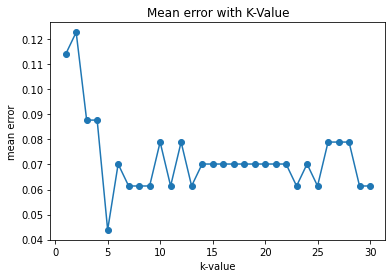

In [14]:
##  k값을 변화시킬 때, 에러가 줄어드는 지
errors = []
for i in range(1, 31):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_std, y_train)
    pred_i = knn.predict(X_test_std)
    errors.append(np.mean(pred_i != y_test))
#     print("k =", i, "정확도: {:.2f}".format(knn.score(X_test_std, y_test)))
print(errors)

plt.plot(range(1, 31), errors, marker='o')
plt.title('Mean error with K-Value')
plt.xlabel('k-value')
plt.ylabel('mean error')
plt.show()

### 참고 Cross validation 

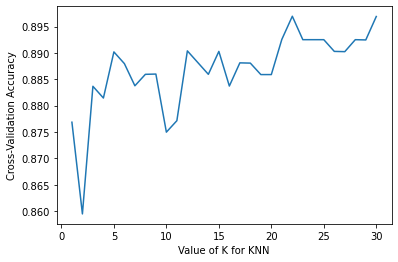

In [15]:
## 모델 개선 - cross validation 
# cross-validation library
from sklearn.model_selection import cross_val_score

k_range = range(1,31)              # k를 1~50까지 고려하여 최적의 k를 찾을 것이다.
k_score_cv = []                        # 각 k들의 성능을 비교하기 위한 리스트생성이다.

for i in k_range :
    knn = KNeighborsClassifier(n_neighbors=i)
     # 10-fold cross-validation
    scores = cross_val_score(knn,X_train_std,y_train,cv=10,scoring = "accuracy")   
     # 10-fold 각각 정확도의 평균으로 성능계산 
    k_score_cv.append(scores.mean())   
    
plt.plot(k_range, k_score_cv)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validation Accuracy')
plt.show()

In [16]:
## Cross validation 결과로 학습/예측(Training/Pradiction)
knn_clf = KNeighborsClassifier(n_neighbors=23)

# 분류기 학습
knn_clf.fit(X_train_std, y_train)
# 예측
y_pred = knn_clf.predict(X_test_std)
# print(y_pred)

# 모델 평가
print("테스트 세트 정확도: {:.2f}".format(knn_clf.score(X_test_std, y_test)))

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

report = classification_report(y_test, y_pred)
print(report)

테스트 세트 정확도: 0.94
[[44  4]
 [ 3 63]]
              precision    recall  f1-score   support

           0       0.94      0.92      0.93        48
           1       0.94      0.95      0.95        66

    accuracy                           0.94       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.94      0.94      0.94       114

